In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 151kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Gujarat1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,7,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,7,0,0,0,0,0,0,0
2,2000,1,1,2,0,17,0,0,0,6,0,0,0,0,0,0,0
3,2000,1,1,3,0,18,73,343,135,0,76,76,286,286,0,128,128
4,2000,1,1,4,0,21,122,604,345,-3,114,114,603,603,0,337,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,15,0,0,0,-4,0,0,0,0,0,0,0
131396,2014,12,31,20,0,14,0,0,0,-4,0,0,0,0,0,0,0
131397,2014,12,31,21,0,14,0,0,0,-4,0,0,0,0,0,0,0
131398,2014,12,31,22,0,13,0,0,0,-4,0,0,0,0,0,0,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,7,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,7,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,17,0,0,0,6,0,0,0,0,0,0,0,2000-01-01 02:00:00
3,2000,1,1,3,0,18,73,343,135,0,76,76,286,286,0,128,128,2000-01-01 03:00:00
4,2000,1,1,4,0,21,122,604,345,-3,114,114,603,603,0,337,337,2000-01-01 04:00:00
5,2000,1,1,5,0,26,149,731,531,-4,140,140,713,713,0,513,513,2000-01-01 05:00:00
6,2000,1,1,6,0,29,164,796,666,-6,154,154,770,770,0,640,640,2000-01-01 06:00:00
7,2000,1,1,7,0,31,171,822,734,-6,153,153,818,818,0,714,714,2000-01-01 07:00:00
8,2000,1,1,8,0,32,170,819,729,-5,184,184,748,748,0,695,695,2000-01-01 08:00:00
9,2000,1,1,9,0,32,162,786,652,-4,147,147,786,786,0,637,637,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,226.1
2000-01-02,227.8
2000-01-03,227.9
2000-01-04,225.9
2000-01-05,228.8
...,...
2014-12-27,214.8
2014-12-28,217.3
2014-12-29,216.4


In [8]:
y_w=y.resample('M').mean()
y_w

,GHI
Date,
2000-01-31,243.790323
2000-02-29,287.332143
2000-03-31,327.806452
2000-04-30,354.970000
2000-05-31,333.290323
...,...
2014-08-31,262.600000
2014-09-30,269.850000
2014-10-31,233.222581


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-31,243.790323
2000-02-29,287.332143
2000-03-31,327.806452
2000-04-30,354.970000
2000-05-31,333.290323
...,...
2011-08-31,238.161290
2011-09-30,233.623333
2011-10-31,250.770968


In [10]:
y[:4380]

,GHI
Date,
2000-01-01,226.1
2000-01-02,227.8
2000-01-03,227.9
2000-01-04,225.9
2000-01-05,228.8
...,...
2011-12-27,215.5
2011-12-28,218.6
2011-12-29,218.8


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(0,5474,365):
  for j in datesInYr:
    X_add = y[i:i+j]
    #print(i,j)
    X_T.append(X_add)
    i+=j
X_T=np.asarray(X_T)
X_T.shape

(180,)

In [14]:
X_T

array([array([226.1, 227.8, 227.9, 225.9, 228.8, 235.1, 232.3, 229.1, 232.9,
       233.9, 234.4, 230.9, 242.2, 242.5, 239.8, 239.1, 245.3, 247.7,
       251.3, 249.2, 242.2, 252.2, 257.5, 255.9, 249.5, 253.9, 262.8,
       263.5, 264.4, 268.9, 264.5]),
       array([263.1, 260.5, 255.7, 196.4, 272.2, 266. , 276.1, 277.9, 276.3,
       275. , 281.5, 286.7, 288. , 291.9, 294.6, 297.4, 298.6, 297.8,
       296.2, 304.4, 304.4, 307. , 310.2, 312.9, 309. , 313.9, 314.7,
       316.9]),
       array([309.5, 310. , 309.8, 295.3, 303.4, 312.1, 311.4, 313.1, 317.2,
       319.4, 322.1, 320. , 323.6, 323.4, 327.9, 330.8, 331.6, 332.2,
       334.6, 337.6, 334.9, 339.6, 340.8, 342.4, 343.1, 344.5, 346.1,
       346.7, 348.9, 344.2, 345.8]),
       array([345.5, 345.6, 348.7, 351.1, 351.5, 352.2, 352.9, 355.1, 354.3,
       355.7, 354.7, 356.1, 354.1, 350.6, 357.8, 359.2, 359. , 360.7,
       351.1, 360.5, 357.4, 352.9, 353.4, 355.6, 358.1, 357.8, 357.8,
       357.1, 359. , 363.6]),
       array

In [15]:
for new in X_T[0:144:12]:
  print(len(new))

31
31
31
31
31
31
31
31
31
31
31
31


In [16]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(180,)

In [17]:
foo=[x.tolist() for x in X_T[0:144:12]]
foo_1=np.array(foo)
foo_2=foo_1.reshape(12,31,1)
foo_2.shape

(12, 31, 1)

In [18]:
Y_T[j:144:12]

array([222.17096774, 228.86451613, 236.59354839, 230.3516129 ,
       224.91612903, 232.43225806, 253.53870968, 262.74193548,
       230.56451613, 238.16129032])

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

modelList=[]
j=0
for i in datesInYr:
  model = Sequential()
  model.add(LSTM(50, activation='relu', input_shape=(i,1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  foo=[xd.tolist() for xd in X_T[j:144:12]]
  foo_1=np.array(foo)
  foo_1=foo_1.reshape(12,i,1)
  # fit model
  model.fit(foo_1, Y_T[j:144:12], epochs=2000, verbose=0)
  modelList.append(model)
  j+=1

In [20]:
X_T[144].shape

(31,)

In [21]:
modelList

In [22]:
# demonstrate prediction
yhat=[]

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(144,180):
  x_input = X_T[i]
  x_input = x_input.reshape(1,datesInYr[i%12],1)
  #print((i-144)%12)
  yRez = modelList[((i-144)%12)].predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[251.99706]]
[[327.55923]]
[[313.56378]]
[[358.63937]]
[[326.1511]]
[[314.5976]]
[[255.46997]]
[[222.5447]]
[[237.44884]]
[[248.0545]]
[[197.60873]]
[[206.69719]]
[[224.37613]]
[[295.2826]]
[[322.61374]]
[[387.7561]]
[[348.90088]]
[[325.53638]]
[[297.83133]]
[[280.49744]]
[[262.60007]]
[[253.07129]]
[[218.58322]]
[[212.84416]]
[[245.69797]]
[[297.3199]]
[[324.57806]]
[[347.43353]]
[[335.8894]]
[[329.2332]]
[[286.47632]]
[[233.41309]]
[[213.74312]]
[[249.03726]]
[[200.54387]]
[[203.81487]]


[array([[251.99706]], dtype=float32),
 array([[327.55923]], dtype=float32),
 array([[313.56378]], dtype=float32),
 array([[358.63937]], dtype=float32),
 array([[326.1511]], dtype=float32),
 array([[314.5976]], dtype=float32),
 array([[255.46997]], dtype=float32),
 array([[222.5447]], dtype=float32),
 array([[237.44884]], dtype=float32),
 array([[248.0545]], dtype=float32),
 array([[197.60873]], dtype=float32),
 array([[206.69719]], dtype=float32),
 array([[224.37613]], dtype=float32),
 array([[295.2826]], dtype=float32),
 array([[322.61374]], dtype=float32),
 array([[387.7561]], dtype=float32),
 array([[348.90088]], dtype=float32),
 array([[325.53638]], dtype=float32),
 array([[297.83133]], dtype=float32),
 array([[280.49744]], dtype=float32),
 array([[262.60007]], dtype=float32),
 array([[253.07129]], dtype=float32),
 array([[218.58322]], dtype=float32),
 array([[212.84416]], dtype=float32),
 array([[245.69797]], dtype=float32),
 array([[297.3199]], dtype=float32),
 array([[324.57806]

In [23]:
len(yhat)

36

In [24]:
y_w[144:].index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [25]:
y_w[144:]


,GHI
Date,
2012-01-31,236.632258
2012-02-29,280.660714
2012-03-31,322.387097
2012-04-30,339.173333
2012-05-31,343.374194
2012-06-30,312.730000
2012-07-31,246.412903
2012-08-31,241.606452
2012-09-30,239.600000


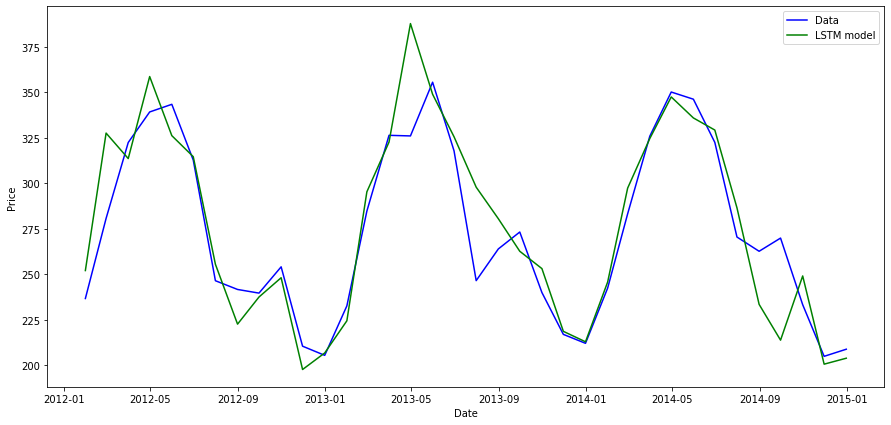

In [27]:
plt.figure(figsize = (15,7))
plt.plot(y_w[144:].index, y_w[144:], color= 'blue', label= 'Data')
plt.plot(y_w[144:].index,np.asarray(yhat).reshape(36,) , color= 'green', label= 'LSTM model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
WriteDF = pd.DataFrame(columns=['Date', 'GHI'])
WriteDF['Date'] = y_w[144:].index
WriteDF['GHI'] = np.asarray(yhat).reshape(36,)
WriteDF.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/LSTM_monthly.csv')

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[144:],np.asarray(yhat).reshape(36,),squared=False)

44.8979584652448

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[144:],np.asarray(yhat).reshape(36,))

0.09834319722984386